In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel("dataframe_pagseguro.xlsx")

In [3]:
df["count"] = 1

In [4]:
df.shape

(649, 20)

In [5]:
df["fl_pagbank"] = df.cargo.str.contains("PAGBANK")

In [6]:
df.columns

Index(['Unnamed: 0', 'cargo', 'localizacao', 'nome', 'perfil', 'fl_nubank',
       'fl_cientista', 'fl_scientist', 'fl_ciencia', 'fl_science',
       'fl_manager', 'fl_gerente', 'fl_engineer', 'fl_data', 'fl_dados',
       'fl_engenheiro', 'fl_machine_learning', '_nome', '_perfil', 'count',
       'fl_pagbank'],
      dtype='object')

## linhas gerais

In [7]:
result = df.groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending = False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

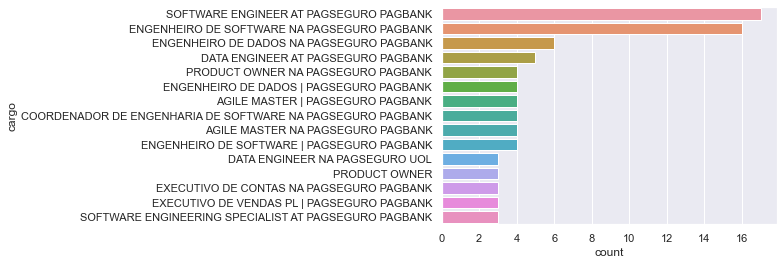

In [8]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(15))

## Cientista

In [9]:
result = df.query("fl_pagbank == 1 and (fl_cientista == 1 or fl_scientist == 1 or fl_machine_learning == 1 or fl_science == 1)").groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

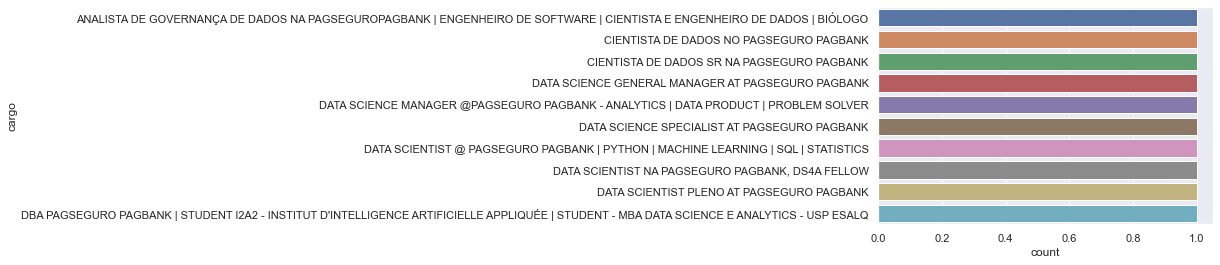

In [10]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(10))

In [11]:
result["count"].sum()

15

15 cientistas (mas tem que limpar esse numero manualmente)

In [12]:
result = df.query("fl_pagbank == 1 and (fl_cientista == 1 or fl_scientist == 1 or fl_machine_learning == 1 or fl_science == 1)").groupby(["localizacao"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='localizacao'>

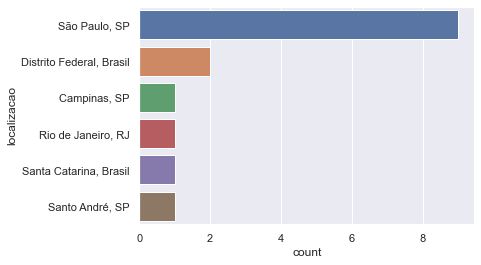

In [13]:
sns.barplot(y="localizacao", x="count", data=result.reset_index().head(10))

## Gerente de cientista

In [14]:
result = df.query("fl_pagbank == 1 and (fl_manager == 1 or fl_gerente == 1) and (fl_cientista == 1 or fl_scientist == 1 or fl_machine_learning or fl_science)").groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

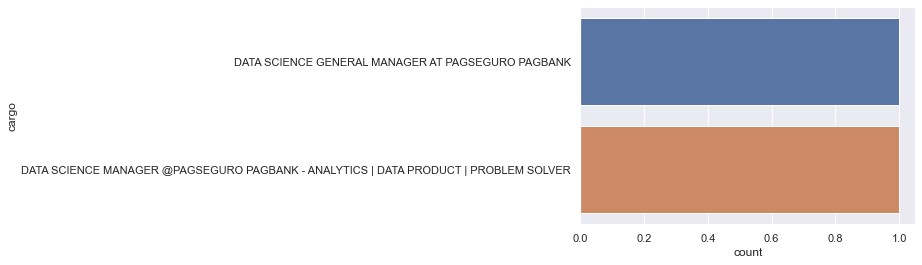

In [15]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(10))

2 gerentes de ciencia de dados

## Engenheiro de dados

In [18]:
result = df.query("fl_pagbank == 1 and ( (fl_engenheiro == 1 and fl_dados == 1) or (fl_engineer == 1 and fl_data == 1) )").groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

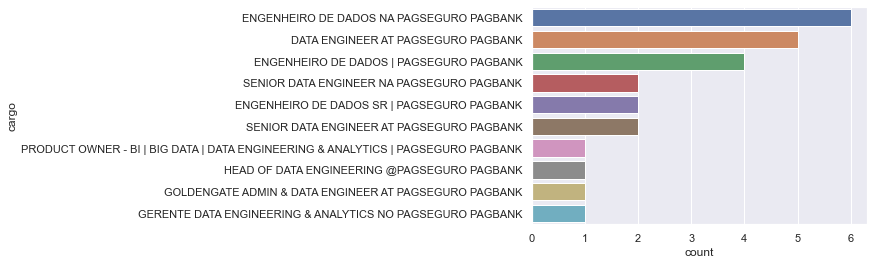

In [19]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(10))

In [20]:
result["count"].sum()

37

37 engenheiro de dados